# ****Classification using Keras CNN

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, ImageDataGenerator
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


### Reading the data

In [2]:
train_data = pd.read_csv ('/kaggle/input/digit-recognizer/train.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### From CSV data to Images


In [3]:
from keras.utils import to_categorical

def extract_train_images(data):
    """
    function to extract list 2d numpy arrays of images and numpy array of labels.
    Input - DataFrame data
    Output - list of 2D numpy arrays for images and 1d numpy array for labels
    
    """
    labels = np.array(data['label'])
    
    data = data.drop('label', axis = 'columns')
    images_array = np.array(data)
    
    images_list = []
    for image_arr in images_array:
        images_list.append(np.array(np.array_split(image_arr, 28))[:,:,np.newaxis])
    
    return images_list, labels

images_list, labels = extract_train_images(train_data)
one_hot_labels = to_categorical(labels)
print(labels)

[1 0 1 ... 7 6 9]


# ****Visualizing the data

Label: 1
Label: 0
Label: 1
Label: 4
Label: 0
Label: 0
Label: 7
Label: 3
Label: 5
Label: 3
Label: 8
Label: 9
Label: 1
Label: 3
Label: 3
Label: 1


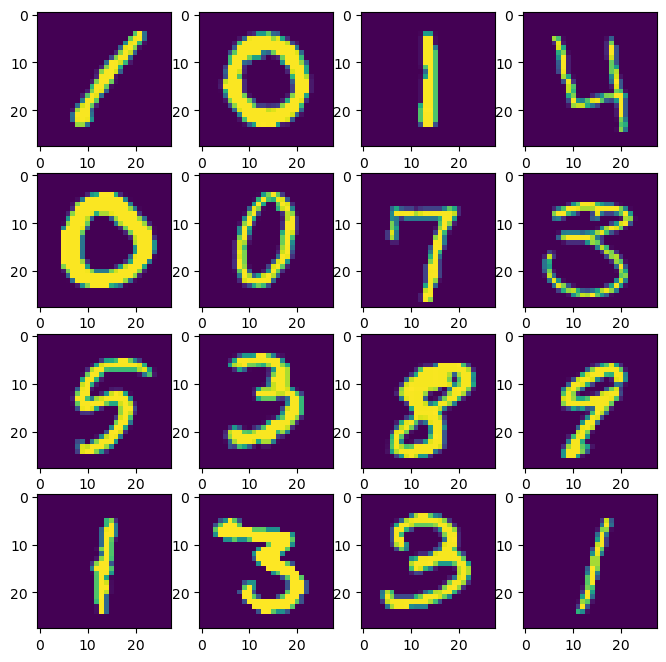

In [4]:
count = 1
fig = plt.figure(figsize = (8,8))
rows = 4
columns = 4
for image, label in zip(images_list, labels):
    fig.add_subplot(rows, columns, count)
    plt.imshow(image[:,:,0])
    print('Label:',label)
    count+=1
    if count >16:
        break
fig.show()

## using Image data generator 

In [5]:
#Training Data Generation
train_gen = ImageDataGenerator(rescale = 1/255.)

train_images = np.array(images_list)
print(train_images.shape)

train_generator = train_gen.flow(train_images, one_hot_labels, batch_size = 32)

(42000, 28, 28, 1)


### Training data

In [6]:
#Test/Validation dataset

test_data = pd.read_csv ('/kaggle/input/digit-recognizer/test.csv')
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
def extract_test_images(data):
    images_array = np.array(data)
    
    images_list = []
    for image_arr in images_array:
        images_list.append(np.array(np.array_split(image_arr, 28))[:,:,np.newaxis])
    
    return images_list

test_images_list = extract_test_images(test_data)

test_images = np.array(test_images_list)
print(test_images.shape)

(28000, 28, 28, 1)


## Using Keras Structure

In [8]:
# Model Definition

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = tf.keras.Sequential([
    Conv2D(32, kernel_size = (3,3), input_shape = (28,28,1), activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(28, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

Here I will define callback function that will be called after every epoch on training dataset. I am forcing an early stopping if accuracy will reach 100% using this callback

In [9]:
import keras

class myCallBack(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        acc = logs.get('accuracy')
        if acc >= 1.0:
            print("\nRequired accuracy achieved so ending the training.")
            self.model.stop_training=True

call_back = myCallBack()

### Training of model on 10 epochs

In [10]:
BS = 32
EPOCHS = 10

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_images.shape[0] // BS,
                              epochs=EPOCHS,
                              callbacks = [call_back])

Epoch 1/10


/tmp/ipykernel_20/3078360242.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


1312/1312 [==============================] - 29s 21ms/step - loss: 0.1881 - accuracy: 0.9424
Epoch 2/10
1312/1312 [==============================] - 28s 21ms/step - loss: 0.0520 - accuracy: 0.9841
Epoch 3/10
1312/1312 [==============================] - 28s 21ms/step - loss: 0.0360 - accuracy: 0.9891
Epoch 4/10
1312/1312 [==============================] - 28s 21ms/step - loss: 0.0261 - accuracy: 0.9922
Epoch 5/10
1312/1312 [==============================] - 27s 21ms/step - loss: 0.0202 - accuracy: 0.9939
Epoch 6/10
1312/1312 [==============================] - 28s 21ms/step - loss: 0.0158 - accuracy: 0.9952
Epoch 7/10
1312/1312 [==============================] - 28s 21ms/step - loss: 0.0120 - accuracy: 0.9964
Epoch 8/10
1312/1312 [==============================] - 28s 21ms/step - loss: 0.0106 - accuracy: 0.9969
Epoch 9/10
1312/1312 [==============================] - 28s 21ms/step - loss: 0.0086 - accuracy: 0.9973
Epoch 10/10
1312/1312 [==============================] - 28s 21ms/step - lo

In [11]:
model.save('digit_recognizer.h5')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# ###using softmax activation 

In [13]:
def onehot_to_label(vec):
    """
    function will convert one hot vector of model output into a single label
    """
    count=0
    for number in vec[0]:
        if number == 1:
            return count
        count+=1
    return -1

### Visualization of images

1/1 [==============================] - 0s 159ms/step
2
1/1 [==============================] - 0s 26ms/step
0
1/1 [==============================] - 0s 24ms/step
9
1/1 [==============================] - 0s 26ms/step
0
1/1 [==============================] - 0s 26ms/step
3
1/1 [==============================] - 0s 24ms/step
7
1/1 [==============================] - 0s 24ms/step
0
1/1 [==============================] - 0s 25ms/step
3
1/1 [==============================] - 0s 28ms/step
0
1/1 [==============================] - 0s 24ms/step
3
1/1 [==============================] - 0s 27ms/step
5
1/1 [==============================] - 0s 25ms/step
7
1/1 [==============================] - 0s 25ms/step
4
1/1 [==============================] - 0s 26ms/step
0
1/1 [==============================] - 0s 26ms/step
4
1/1 [==============================] - 0s 23ms/step
3


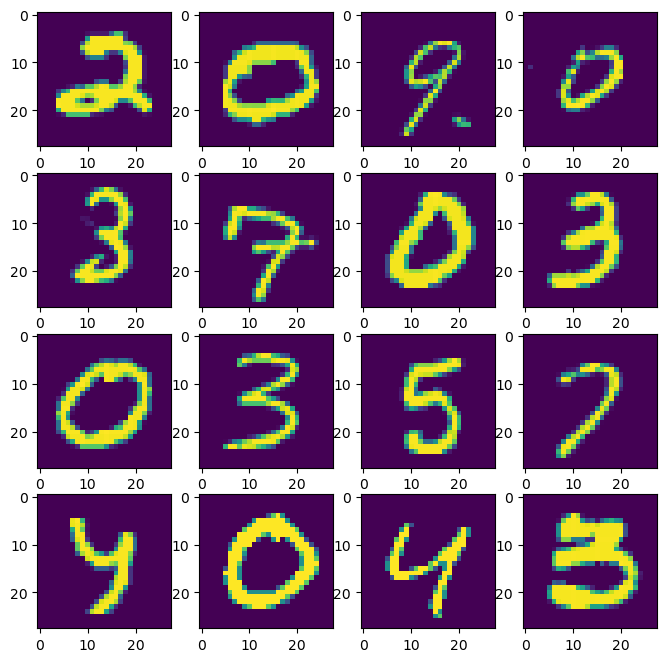

In [14]:
count = 1
fig = plt.figure(figsize = (8,8))
rows = 4
columns = 4
for image in test_images:
    fig.add_subplot(rows, columns, count)
    plt.imshow(image[:,:,0])
    print(onehot_to_label(model.predict(image.reshape(1,28,28,1))))
    count+=1
    if count >16:
        break
fig.show()